# **Training Artificial Neural Networks on Numerical Data**

## **Data Preparation and Processing - (Video4 - Keras with TensorFlow - Data Processing for Neural Network Training)**

In [40]:
# Imports from Video 4 - Data Preparation and Processing
# Source link: https://www.youtube.com/watch?v=3FwGDUD_ZuQ&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=4
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [41]:
# Imports from Video 5 - Create an Artificial Neural Network with TensorFlow's Keras API 
# Source link: https://www.youtube.com/watch?v=HrfrN3hn7QE&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=5
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

# Imports needed for Video 6 - Train an Artificial Neural Network with TensorFlow's Keras API
# Source link: https://www.youtube.com/watch?v=I8eI4ZhcYdM&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=6
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [42]:
# Imports from Video 9 - Create a Confusion Matrix for Neural Network Predictions
# Source link: https://www.youtube.com/watch?v=VYGVOwlT4oE&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=9
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [43]:
# Imports from Video 1 - Jupyter Notebooks with Kaggle
# Source link: https://www.youtube.com/watch?v=xahuqmcknZ0&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=1
import os
import shutil

# Import from Video 10 - Save and Load a Model with TensorFlow's Keras API
# Source link: https://www.youtube.com/watch?v=8Nl-of5C3uA&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=10
import os.path

## **Inputs and Labels Intialization for Train dataset** 

In [44]:
train_labels = []
train_samples = []

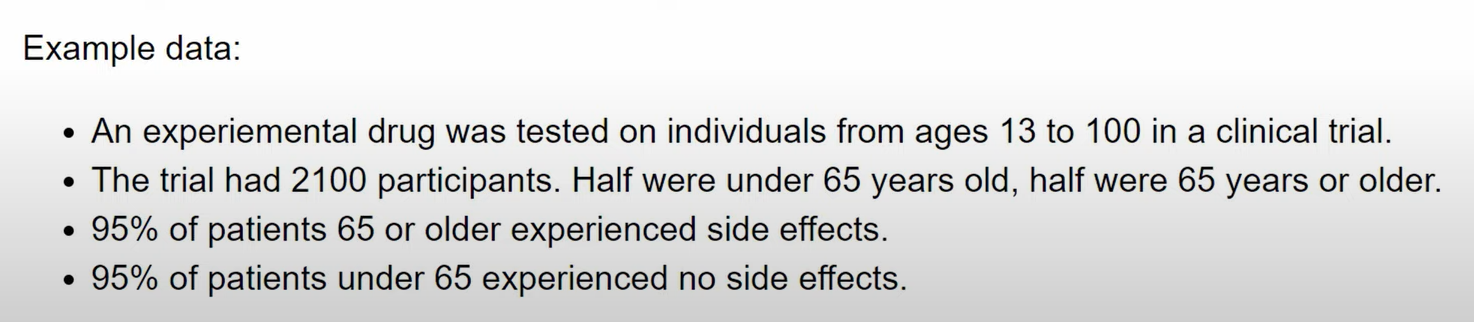

In [45]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    #The 95% older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [46]:
for i in train_samples:
    print(i)

36
69
41
72
20
88
16
73
46
80
39
100
18
99
56
99
44
85
32
66
38
66
21
68
51
96
38
96
40
71
55
93
18
69
21
93
39
74
32
88
30
87
48
84
30
97
19
74
50
98
25
100
33
87
14
100
54
73
13
73
31
91
13
74
48
76
27
81
52
66
49
75
33
87
52
87
22
95
39
98
50
68
36
92
40
89
47
83
26
98
41
71
52
88
35
91
63
95
58
100
38
76
54
69
48
78
31
96
21
68
64
92
46
94
30
70
19
95
24
91
28
87
54
82
23
74
34
69
45
95
13
86
35
85
45
85
18
87
26
89
17
70
50
92
38
67
24
73
51
71
60
95
41
87
61
76
41
90
53
78
22
89
26
79
13
100
32
82
63
69
28
66
19
77
33
72
14
84
41
85
49
70
21
79
62
99
23
89
46
83
41
73
62
89
44
82
24
67
45
82
38
98
26
75
55
85
14
81
55
70
20
92
56
67
36
82
50
67
56
72
54
93
39
92
40
70
38
76
57
82
34
96
18
72
63
92
56
96
58
75
43
69
55
99
48
72
53
76
32
97
28
85
60
82
17
78
26
80
54
95
23
77
30
88
64
98
37
68
46
66
44
92
62
78
48
78
25
71
19
97
18
72
59
67
48
83
13
97
58
67
59
66
38
76
56
93
25
96
55
72
37
81
49
66
52
74
46
82
35
77
16
73
57
81
51
78
60
76
56
79
50
76
56
91
45
75
18
79
58
81
63
94

In [47]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [48]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [49]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [50]:
#print scaled data
for i in scaled_train_samples:
    print(i)

[0.55172414]
[0.5862069]
[0.24137931]
[0.97701149]
[0.52873563]
[0.87356322]
[0.3908046]
[0.14942529]
[0.37931034]
[0.77011494]
[0.74712644]
[0.3908046]
[0.45977011]
[0.73563218]
[0.16091954]
[0.81609195]
[0.3908046]
[0.89655172]
[0.26436782]
[0.34482759]
[0.77011494]
[0.91954023]
[0.88505747]
[0.75862069]
[0.68965517]
[0.59770115]
[0.34482759]
[0.49425287]
[0.3908046]
[0.71264368]
[0.27586207]
[0.54022989]
[0.97701149]
[0.28735632]
[0.75862069]
[0.66666667]
[0.68965517]
[0.36781609]
[0.48275862]
[0.71264368]
[0.34482759]
[0.63218391]
[0.44827586]
[0.67816092]
[0.77011494]
[0.09195402]
[0.40229885]
[0.44827586]
[0.6091954]
[0.66666667]
[0.5862069]
[0.89655172]
[0.63218391]
[0.97701149]
[0.36781609]
[0.8045977]
[0.47126437]
[0.66666667]
[0.79310345]
[0.89655172]
[0.50574713]
[0.6091954]
[0.36781609]
[0.10344828]
[0.62068966]
[0.70114943]
[0.65517241]
[0.48275862]
[0.18390805]
[0.29885057]
[0.57471264]
[0.22988506]
[0.31034483]
[1.]
[0.68965517]
[0.73563218]
[0.73563218]
[0.13793103]
[0.

## **Simple tf.keras Sequential Model (Video5 - Create an Artificial Neural Network with TensorFlow's Keras API)**

In [51]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## **Video6 - Train an Artificial Neural Network with TensorFlow's Keras API**

In [53]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **Add Validation Split (Video7 - Build a Validation Set With TensorFlow's Keras API)**

In [54]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6837 - accuracy: 0.5360 - val_loss: 0.6833 - val_accuracy: 0.4762 - 1s/epoch - 6ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6661 - accuracy: 0.6238 - val_loss: 0.6675 - val_accuracy: 0.5810 - 333ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6385 - accuracy: 0.7376 - val_loss: 0.6400 - val_accuracy: 0.6905 - 353ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6085 - accuracy: 0.7762 - val_loss: 0.6178 - val_accuracy: 0.7048 - 336ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5794 - accuracy: 0.8016 - val_loss: 0.5938 - val_accuracy: 0.7333 - 366ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5483 - accuracy: 0.8101 - val_loss: 0.5658 - val_accuracy: 0.7571 - 360ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5163 - accuracy: 0.8296 - val_loss: 0.5366 - val_accuracy: 0.7952 - 349ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4841 - accuracy: 0.8529 - val_loss: 0.5098 - val_accuracy: 0.7952 - 353ms/epoch - 2ms/step
Epo

## **Preprocess Test Dataset (Video8 - Neural Network Predictions with TensorFlow's Keras API)**

In [55]:
test_labels = []
test_samples = []

In [56]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    #The 95% older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [57]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [58]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## **Predict (Video8 - Neural Network Predictions with TensorFlow's Keras API)**

In [59]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [60]:
for i in predictions:
    print(i)

[0.09868523 0.90131474]
[0.9245456  0.07545446]
[0.02605962 0.97394043]
[0.03287901 0.967121  ]
[0.05519653 0.9448035 ]
[0.05519653 0.9448035 ]
[0.69536936 0.30463073]
[0.85187334 0.14812666]
[0.9487052  0.05129476]
[0.41019702 0.589803  ]
[0.1748488 0.8251511]
[0.05202812 0.9479718 ]
[0.8344369  0.16556303]
[0.37866795 0.6213321 ]
[0.90618473 0.09381521]
[0.94127023 0.05872973]
[0.85187334 0.14812666]
[0.9664514  0.03354841]
[0.96846396 0.03153604]
[0.15660614 0.84339386]
[0.02605962 0.97394043]
[0.06717882 0.93282115]
[0.9630779 0.0369221]
[0.9163262  0.08367377]
[0.03102764 0.96897244]
[0.13994402 0.86005586]
[0.290827   0.70917296]
[0.08762431 0.9123756 ]
[0.9604663  0.03953364]
[0.21627031 0.7837297 ]
[0.9562145  0.04378544]
[0.04915329 0.9508466 ]
[0.04642954 0.9535704 ]
[0.44248164 0.5575183 ]
[0.5082526  0.49174738]
[0.9643106  0.03568935]
[0.37866795 0.6213321 ]
[0.04140706 0.9585929 ]
[0.8949231 0.1050769]
[0.04642954 0.9535705 ]
[0.0629382 0.9370617]
[0.34813195 0.65186805]


In [61]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [62]:
for i in rounded_predictions:
    print(i)

1
0
1
1
1
1
0
0
0
1
1
1
0
1
0
0
0
0
0
1
1
1
0
0
1
1
1
1
0
1
0
1
1
1
0
0
1
1
0
1
1
1
1
1
1
0
0
1
0
1
0
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
1
0
1
1
1
0
1
1
1
1
0
0
0
0
0
1
0
1
1
0
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
1
0
1
0
0
0
0
1
0
0
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
0
0
0
1
1
1
0
0
0
0
0
1
1
1
0
1
1
0
1
0
1
0
1
0
1
1
1
1
1
0
0
1
0
0
1
0
0
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
1
1
1
0
0
1
1
0
1
0
0
0
1
0
0
0
0
1
0
1
1
0
0
0
1
0
1
0
0
1
0
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
0
1
1
1
1
0
1
0
1
0
0
0
1
1
1
1
1
1
0
0
1
0
0
1
0
1
0
1
1
0
0
0
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
1
0
0
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
1
1
0
1
0
1
1
0
1
0
0
1
0
0
1
1
1
1
1
0
0
1


## **Confusion Matrix** 

In [63]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [64]:
def plot_confusion_matrix(cm, classes,
                         normalize=False, 
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[189  21]
 [ 10 200]]


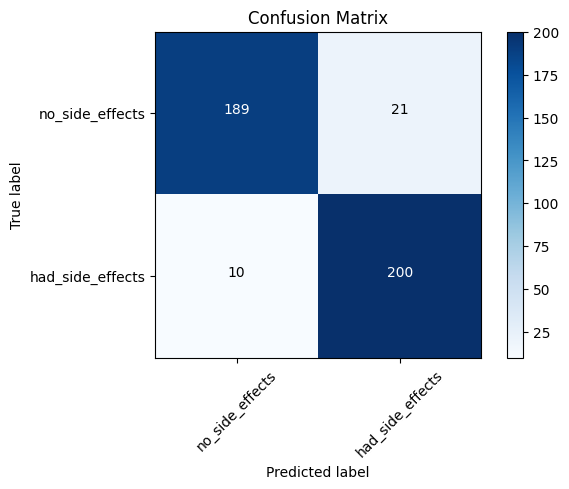

In [65]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## **Save and Load a Model**

### 1. model.save()

In [66]:
# Checks first to see if file exists already.
# If not, the model is saved to specified directory.
if os.path.isfile('/kaggle/working/models/medical_trial_model.h5') is False:
    model.save('/kaggle/working/models/medical_trial_model.h5')

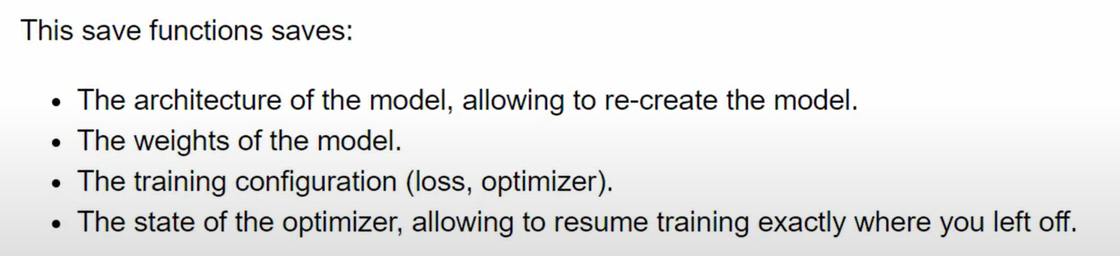

In [67]:
from tensorflow.keras.models import load_model
new_model = load_model('/kaggle/working/models/medical_trial_model.h5')

In [68]:
new_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 16)                32        
                                                                 
 dense_58 (Dense)            (None, 32)                544       
                                                                 
 dense_59 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [69]:
new_model.get_weights()

[array([[ 0.18566455,  0.5123316 , -0.50571585, -0.56028545, -0.49808872,
          0.23815422, -0.54142404,  0.4102987 , -0.08172107, -0.35719556,
          0.44657606,  0.10246792, -0.54057306,  0.6819753 , -0.48314723,
          0.7526991 ]], dtype=float32),
 array([ 0.24950634, -0.1365632 ,  0.        ,  0.        ,  0.        ,
        -0.08489889,  0.        , -0.12618783,  0.        ,  0.        ,
        -0.12328507,  0.19420014,  0.        , -0.16946474,  0.        ,
        -0.14095017], dtype=float32),
 array([[-2.01133519e-01,  3.50641422e-02, -8.15155283e-02,
          2.68813998e-01,  1.47872388e-01, -5.81236184e-02,
          2.43140524e-03,  3.55630997e-03, -2.44352341e-01,
         -1.58558056e-01,  3.78694177e-01, -2.83256799e-01,
          2.05006808e-01, -2.46889144e-01,  2.98610568e-01,
          3.22255015e-01,  3.42702210e-01,  2.06460625e-01,
          3.51173222e-01, -1.44345954e-01,  3.01080465e-01,
         -2.18004823e-01,  9.44296792e-02,  3.74852046e-02,
 

In [70]:
new_model.optimizer

### 2. model.to_json()

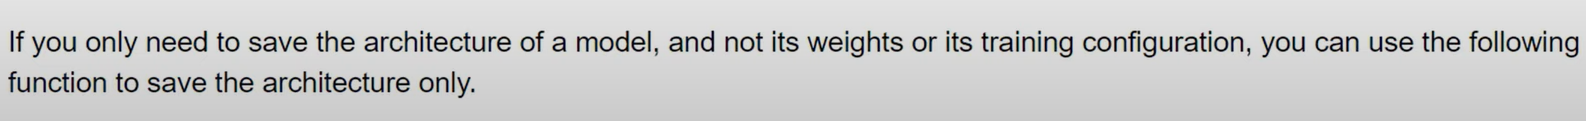

In [71]:
#save as JSON
json_string = model.to_json()

In [72]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_6_input"}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [73]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras,models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [74]:
model_architecture.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [75]:
# Checks first see if file exists already.
# If not, the weights are saved to the specified directory.
if os.path.isfile('/kaggle/working/models/my_model_weights.h5') is False:
    model.save_weights('/kaggle/working/models/my_model_weights.h5')

In [76]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [77]:
model2.load_weights('/kaggle/working/models/my_model_weights.h5')

In [79]:
model2.get_weights()

[array([[-0.25154272, -0.29219064,  0.3979841 , -0.39968115, -0.35872275,
          0.37244087, -0.07287598, -0.24480397,  0.4033318 , -0.1314407 ,
         -0.26836112, -0.506884  , -0.00089186, -0.20443395, -0.13556533,
          0.49906892]], dtype=float32),
 array([ 0.        ,  0.        , -0.10787618,  0.        ,  0.        ,
        -0.08437762,  0.        ,  0.        ,  0.05505149,  0.        ,
         0.        ,  0.        , -0.00024623,  0.        ,  0.22304747,
        -0.09247229], dtype=float32),
 array([[-2.43963316e-01, -1.44059017e-01, -2.20721364e-02,
          1.71627849e-01,  2.74983138e-01, -2.42662668e-01,
         -2.02451885e-01,  3.38664323e-01,  2.24678785e-01,
         -3.51043195e-01,  2.23043054e-01,  2.23191082e-02,
         -1.55178905e-02,  2.97894090e-01, -1.23544469e-01,
         -2.09001154e-01, -2.58471012e-01,  1.49041265e-01,
         -1.22843310e-01, -3.40915412e-01, -1.65104866e-05,
         -1.73630849e-01, -1.19496763e-01,  1.70208126e-01,
 